In [2]:
import wfdb
import numpy as np
import pandas as pd
import neurokit2 as nk
import wfdb
import os
import ast
import numpy as np
import plotly.graph_objects as go

In [3]:
from ECGfeaturizer import featurize as ef
from ECGfeaturizer import featurize0 as ef0

In [4]:
%reload_ext autoreload

In [5]:
#Set the read file path
path = 'D:/Test Jupyter/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptbxl/'
# directory = '/D:/Test Jupyter/ECG-Classfier-main/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/records100/00000/'

In [6]:
X = np.load(path + 'raw100.npy', allow_pickle=True)

In [7]:
ecg = X[12567][:,0]

In [30]:
# Create an instance of the get_features class
features_extractor = ef0.get_features(r_peak=True, r_int=True, p_peak=True, p_int=True, t_peak=True, t_int=True, q_peak=True, q_int=True, s_peak=True, s_int=True, qrs_dur=True, qt_dur=True, pr_dur=True)

# Specify the ECG recording and sample frequency
recording = ecg# Your ECG recording data, e.g., a NumPy array
sample_freq = 100# Your sample frequency, e.g., 1000

# Call the featurize_ecg method
feature_list, feature_name, peaks = features_extractor.featurize_ecg(recording, sample_freq)

# Print the extracted features
# for name, value in zip(feature_name, feature_list):
#     print(f"{name}: {value}")

p_peaks, q_peaks, r_peaks, s_peaks, t_peaks = peaks



In [9]:
p_peaks

array([ 24,  98, 171, 223, 292, 352, 412, 448, 491, 564, 655, 701, 772,
       831, 867, 951], dtype=int64)

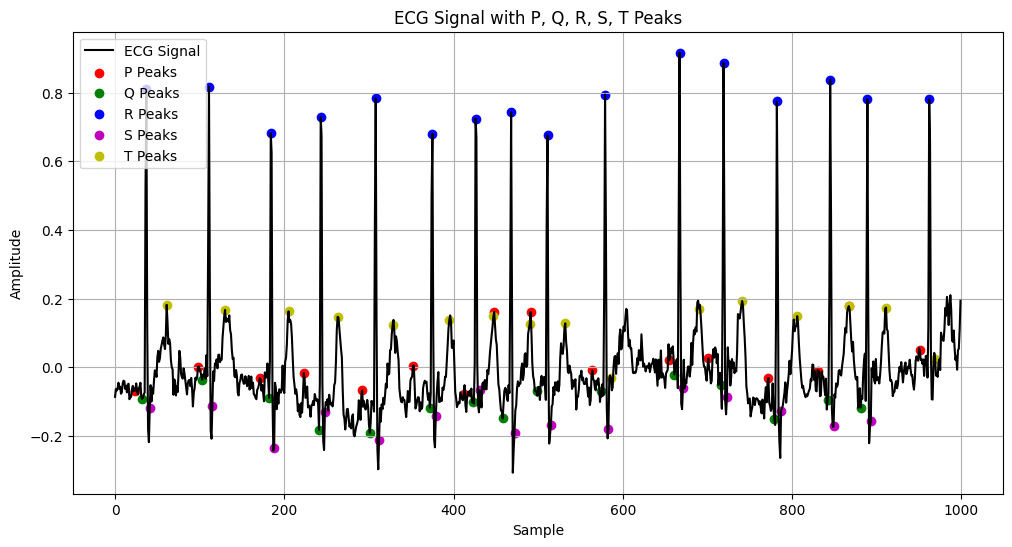

In [39]:
import matplotlib.pyplot as plt

ecg = X[12567][:,0]

# Create an instance of the get_features class
# features_extractor = ef.get_features(r_peak=True, r_int=True, p_peak=True, p_int=True, t_peak=True, t_int=True, q_peak=True, q_int=True, s_peak=True, s_int=True, qrs_dur=True, qt_dur=True, pr_dur=True)
features_extractor = ef.get_features(r_peak=True, r_int=True, p_peak=True, p_int=True, t_peak=True, t_int=True, q_peak=True, q_int=True, s_peak=True, s_int=True, qrs_dur=True, qt_dur=True, pr_dur=True)

# Specify the ECG recording and sample frequency
recording = ecg# Your ECG recording data, e.g., a NumPy array
sample_freq = 100# Your sample frequency, e.g., 1000

# Call the featurize_ecg method
feature_list, feature_name, intervals, peaks = features_extractor.featurize_ecg(recording, sample_freq)
feature_list, feature_name, intervals = features_extractor.corr_and_featurize_ecg(recording, sample_freq, r_peaks, s_peaks, q_peaks, p_peaks, t_peaks)



# Plot the ECG signal
plt.figure(figsize=(12, 6))
plt.plot(ecg, color='black', label='ECG Signal')

# Plot P, Q, R, S, and T peaks
plt.scatter(p_peaks, ecg[p_peaks], c='r', marker='o', label='P Peaks')
plt.scatter(q_peaks, ecg[q_peaks], c='g', marker='o', label='Q Peaks')
plt.scatter(r_peaks, ecg[r_peaks], c='b', marker='o', label='R Peaks')
plt.scatter(s_peaks, ecg[s_peaks], c='m', marker='o', label='S Peaks')
plt.scatter(t_peaks, ecg[t_peaks], c='y', marker='o', label='T Peaks')

plt.title('ECG Signal with P, Q, R, S, T Peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


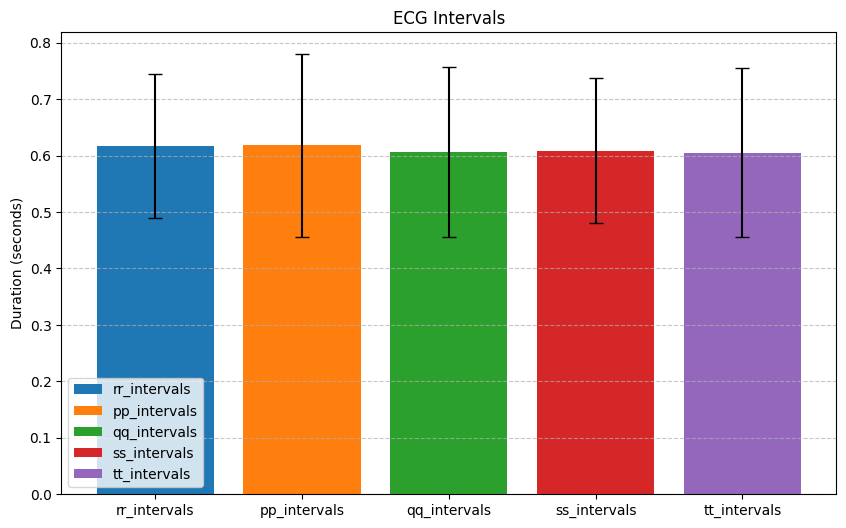

In [11]:
import matplotlib.pyplot as plt

# Create a bar plot for intervals
plt.figure(figsize=(10, 6))
for key, value in intervals.items():
    plt.bar(key, np.nanmean(value), yerr=np.nanstd(value), capsize=5, label=key)

plt.ylabel('Duration (seconds)')
plt.title('ECG Intervals')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


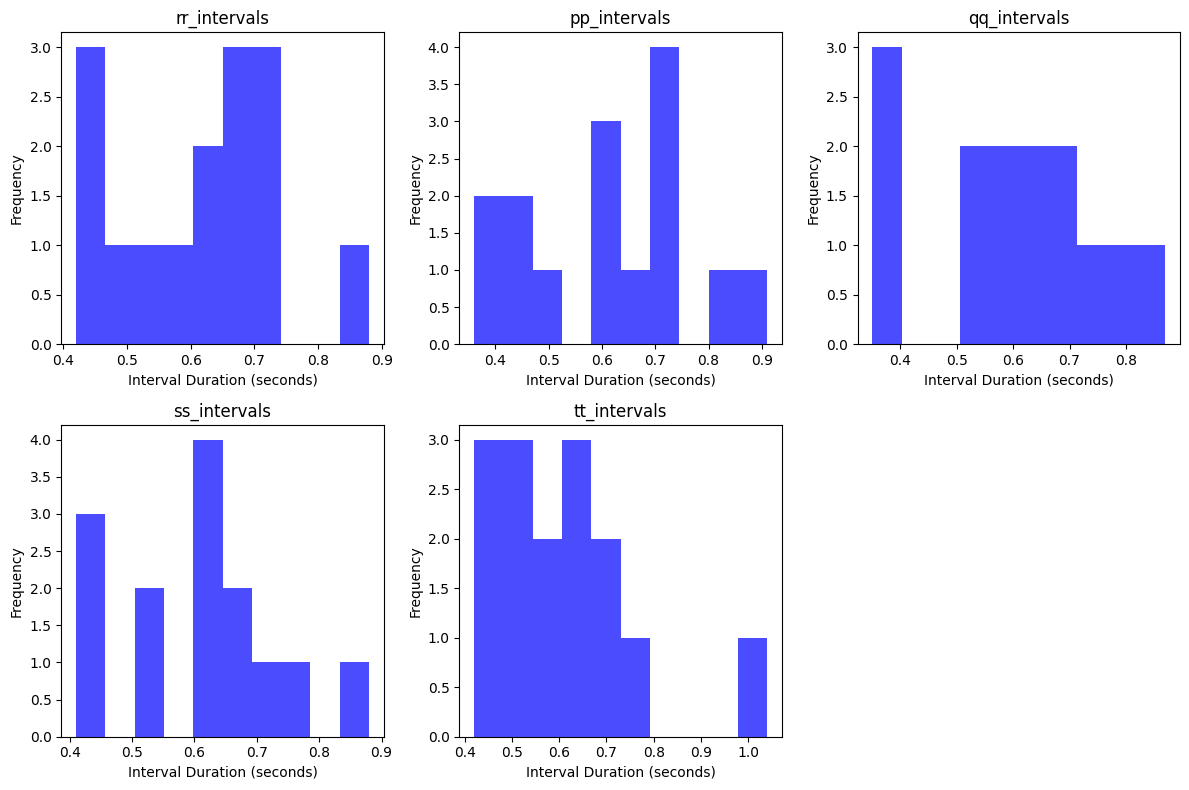

In [29]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have the 'intervals' variable containing your intervals
# rr_intervals = intervals['rr_intervals']
# pp_intervals = intervals['pp_intervals']
# qq_intervals = intervals['qq_intervals']
# ss_intervals = intervals['ss_intervals']
# tt_intervals = intervals['tt_intervals']

# # Create subplots for each interval
# plt.figure(figsize=(12, 8))

# # Plot RR intervals
# plt.subplot(2, 3, 1)
# plt.hist(rr_intervals, bins=30, color='b', alpha=0.7)
# plt.title('RR Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# # Plot PP intervals
# plt.subplot(2, 3, 2)
# plt.hist(pp_intervals, bins=30, color='g', alpha=0.7)
# plt.title('PP Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# # Plot QQ intervals
# plt.subplot(2, 3, 3)
# plt.hist(qq_intervals, bins=30, color='r', alpha=0.7)
# plt.title('QQ Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# # Plot SS intervals
# plt.subplot(2, 3, 4)
# plt.hist(ss_intervals, bins=30, color='m', alpha=0.7)
# plt.title('SS Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# # Plot TT intervals
# plt.subplot(2, 3, 5)
# plt.hist(tt_intervals, bins=30, color='y', alpha=0.7)
# plt.title('TT Intervals')
# plt.xlabel('Interval Duration (s)')
# plt.ylabel('Frequency')

# plt.tight_layout()  # Ensure proper spacing between subplots
# plt.show()




# Create subplots for each interval
plt.figure(figsize=(12, 8))
for i, (interval_name, interval_data) in enumerate(intervals.items()):
    plt.subplot(2, 3, i + 1)
    # Adjust the 'bins' parameter for a smoother histogram
    # plt.hist(interval_data, bins=np.arange(min(interval_data), max(interval_data) + 1, 1), color='blue', alpha=0.7)
    plt.hist(interval_data, bins=10, color='blue', alpha=0.7)
    plt.title(interval_name)
    plt.xlabel("Interval Duration (seconds)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Insights from the Histograms:
RR Intervals: RR intervals correspond to the time between successive R-peaks in the ECG signal. The histogram can reveal the heart rate variability, which may have clinical significance. A wider spread of RR intervals suggests more irregular heartbeats.

PP Intervals: PP intervals represent the time between successive P-peaks. These intervals can provide insights into the atrial activity and regularity.

QQ Intervals: QQ intervals measure the time between successive Q-peaks. These intervals might be associated with certain arrhythmias or conduction issues.

SS Intervals: SS intervals indicate the time between successive S-peaks. These intervals can be related to ventricular activity.

TT Intervals: TT intervals represent the time between successive T-peaks. These intervals may also indicate variability in the repolarization of the heart.

Interpretation:
If the histograms for RR intervals show a narrow peak, it suggests a regular heart rate. A broader distribution may indicate irregular heartbeats.
PP, QQ, SS, and TT intervals can be essential in diagnosing atrial and ventricular arrhythmias or conduction disorders.
By comparing the histograms, you can look for relationships between different intervals, which may provide insights into the cardiac conduction system's health and functioning.
Keep in mind that these insights are general, and specific findings should be interpreted by healthcare professionals or cardiologists, especially when dealing with real patient data. The visualizations can help identify patterns and outliers that might require further investigation.

In [13]:
intervals

{'rr_intervals': array([0.74, 0.73, 0.59, 0.65, 0.67, 0.51, 0.42, 0.43, 0.68, 0.88, 0.52,
        0.63, 0.63, 0.44, 0.73]),
 'pp_intervals': array([0.74, 0.73, 0.52, 0.69, 0.6 , 0.6 , 0.36, 0.43, 0.73, 0.91, 0.46,
        0.71, 0.59, 0.36, 0.84]),
 'qq_intervals': array([0.71, 0.79, 0.59, 0.6 , 0.71, 0.51, 0.35, 0.4 , 0.76, 0.87, 0.55,
        0.63, 0.63, 0.39]),
 'ss_intervals': array([0.74, 0.73, 0.6 , 0.64, 0.67, 0.52, 0.41, 0.43, 0.68, 0.88, 0.52,
        0.64, 0.62, 0.44]),
 'tt_intervals': array([0.69, 0.75, 0.58, 0.65, 0.67, 0.52, 0.43, 0.42, 0.54, 1.04, 0.51,
        0.65, 0.61, 0.44, 0.58])}

In [14]:
feature_list

array([ 0.61666667,  0.12773236,  0.7755625 ,  0.06775966,  0.618     ,
        0.16178999,  0.01740846,  0.07369922,  0.60533333,  0.15046004,
        0.1319695 ,  0.07803378,  0.60642857,  0.15055171, -0.08061748,
        0.0292182 ,  0.60857143,  0.12877761, -0.12773504,  0.03246786,
        9.6       ,  2.9844    ,         nan,         nan, 15.875     ,
        3.95087   ])

In [15]:
feature_name

array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
       'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
       'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
       'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
       'mean_q_peak', 'sd_q_peak', 'mean_s_peak', 'sd_s_peak', 'qrs_mean',
       'qrs_std', 'qt_mean', 'qt_std', 'pr_mean', 'pr_std'], dtype='<U16')

In [11]:
# from ECGfeaturizer import featurize as ef

# # Create an instance of the get_features class
# features_extractor = ef.get_features(r_peak=True, r_int=True, p_peak=True, p_int=True, t_peak=True, t_int=True, q_peak=True, q_int=True, s_peak=True, s_int=True, qrs_dur=True, qt_dur=True, pr_dur=True)

# # Define the lead you want to extract features from (e.g., lead 0)
# lead_to_extract = 0

# # Initialize lists to store features for all ECG records
# all_feature_lists = []
# all_feature_names = []

# # Counter for printing progress
# records_processed = 0

# # Iterate through each ECG record in X
# for ecg in X:
#     # Extract the ECG recording and set the sample frequency (assuming 1000 Hz)
#     recording = ecg[:, lead_to_extract]
#     sample_freq = 100  # Adjust the sample frequency if it's different

#     # Call the featurize_ecg method
#     feature_list, feature_name, _ = features_extractor.featurize_ecg(recording, sample_freq)

#     # Append the extracted features to the lists
#     all_feature_lists.append(feature_list)
#     all_feature_names.append(feature_name)

#     # Increment the records processed counter
#     records_processed += 1

#     # Print progress after every 1000 records
#     if records_processed % 1000 == 0:
#         print(f"Processed {records_processed} records")

# # Now you have the extracted features for all ECG records in 'all_feature_lists' and their corresponding names in 'all_feature_names'.


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packag

Processed 1000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:

Processed 2000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

Processed 3000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 4000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

Processed 5000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 6000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 7000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 8000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

Processed 9000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

Processed 10000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 11000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packag

Processed 12000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 13000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:

Processed 14000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Use

Processed 15000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packag

Processed 16000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

Processed 17000 records


d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\Tes

Processed 18000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packag

Processed 19000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

Processed 20000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:139: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(t_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

Processed 21000 records


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
d:\Test Jupyter\ECG-Classfier-main\code\ECGfeaturizer\featurize.py:159: RuntimeWarning: Mean of empty slice.
  feature_list.append((np.diff(q_peaks)/sample_freq).mean())
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: i

In [13]:
all_feature_names

[array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
        'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
        'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
        'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
        'mean_q_peak', 'sd_q_peak', 'mean_s_peak', 'sd_s_peak', 'qrs_mean',
        'qrs_std', 'qt_mean', 'qt_std', 'pr_mean', 'pr_std'], dtype='<U16'),
 array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
        'mean_pp_interval', 'sd_pp_interval', 'mean_p_peak', 'sd_p_peak',
        'mean_tt_interval', 'sd_tt_interval', 'mean_t_peak', 'sd_t_peak',
        'mean_qq_interval', 'sd_qq_interval', 'mean_q_peak', 'sd_q_peak',
        'mean_q_peak', 'sd_q_peak', 'mean_s_peak', 'sd_s_peak', 'qrs_mean',
        'qrs_std', 'qt_mean', 'qt_std', 'pr_mean', 'pr_std'], dtype='<U16'),
 array(['mean_rr_interval', 'sd_rr_interval', 'mean_r_peak', 'sd_r_peak',
        'mean_pp_interval', 

In [12]:
all_feature_lists

[array([ 9.40000000e-01,  1.49071198e-02,  5.96700000e-01,  5.69632338e-02,
         9.44444444e-01,  5.47947911e-02,  6.74054292e-02,  3.12024046e-02,
         9.40000000e-01,  9.20144916e-02,  2.20656609e-02,  7.62759502e-02,
         9.37500000e-01,  1.39194109e-02, -4.70345236e-02,  1.70020277e-02,
         9.26250000e-01,  5.65547301e-02, -5.86236777e-02,  8.38237741e-03,
         1.17777800e+01,  4.26296000e+00,             nan,             nan,
         1.30000000e+01,  2.64575000e+00]),
 array([ 1.27166667e+00,  7.60299649e-02,  5.49428571e-01,  4.34605146e-02,
         1.27500000e+00,  1.16583304e-01, -2.93640131e-02,  4.55885075e-02,
         1.27166667e+00,  7.73340517e-02,  3.79998946e-01,  1.10565475e-02,
         1.28800000e+00,  6.93974063e-02, -6.04007459e-02,  1.85254857e-02,
         1.29200000e+00,  6.58483105e-02, -1.55933056e-01,  2.80636407e-02,
         8.00000000e+00,  1.15470000e+00,             nan,             nan,
         2.50000000e+01,  5.04268000e+00]),


In [18]:
# Create a DataFrame using the first row of feature names as columns
# column_names = all_feature_names[0]
feature_df = pd.DataFrame(all_feature_lists, columns=feature_name)

In [22]:
feature_df.tail()

,mean_rr_interval,sd_rr_interval,mean_r_peak,sd_r_peak,mean_pp_interval,sd_pp_interval,mean_p_peak,sd_p_peak,mean_tt_interval,sd_tt_interval,...,mean_q_peak,sd_q_peak,mean_s_peak,sd_s_peak,qrs_mean,qrs_std,qt_mean,qt_std,pr_mean,pr_std
21832,0.555625,0.029148,0.967118,0.353867,0.558125,0.043188,0.124854,0.045820,0.555625,0.054425,...,0.556667,0.060955,-0.167626,0.039366,9.87500,4.38570,NaN,NaN,12.58824,1.61095
21833,0.894444,0.011653,0.563500,0.038754,0.895556,0.050577,0.038483,0.030611,0.917778,0.126208,...,0.893750,0.044704,-0.069715,0.016875,12.55556,2.75322,NaN,NaN,13.50000,2.87228
21834,1.022500,0.040850,0.652000,0.032626,1.037500,0.046837,0.006598,0.019797,1.025000,0.103803,...,1.018571,0.072787,-0.066481,0.013405,12.00000,2.64575,NaN,NaN,18.55556,4.71666
21835,0.858000,0.055281,0.499455,0.242918,0.858000,0.064622,0.070872,0.126911,0.839000,0.129727,...,0.858889,0.092550,-0.055662,0.022180,NaN,NaN,NaN,NaN,16.54545,1.15708
21836,1.013333,0.009428,0.824800,0.049124,0.997778,0.069407,-0.013205,0.013599,1.013750,0.012183,...,1.008750,0.026190,-0.062255,0.032704,14.00000,2.82843,31.88889,2.60104,19.50000,4.80104


In [21]:
feature_df.shape

(21837, 26)

### Save feature df

In [24]:
save_path = 'D:/Test Jupyter/ECG-Classfier-main/data/'

np.save(save_path+'feature_df.npy', feature_df)
# np.save(save_path+'y_train.npy', np.array(y_train))

### Load feature df

In [8]:
data_filepath = 'D:/Test Jupyter/ECG-Classfier-main/data/'

feature_df = np.load(data_filepath + 'feature_df.npy')

In [9]:

# Read the file and convert tags
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [10]:

# Get diagnostic information in scp_statements.csv
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)

In [11]:
agg_df = agg_df[agg_df.diagnostic == 1]

In [14]:
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in agg_df.index:
            res.add(agg_df.loc[k].diagnostic_class)
    return list(res)

In [12]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [15]:
Y['scp_classes'] = Y.scp_codes.apply(diagnostic_class)

In [16]:
Z = pd.DataFrame(0, index=Y.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')
for i in Z.index:
    for k in Y.loc[i].scp_classes:
        Z.loc[i, k] = 1

Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


In [17]:
feature_df.shape

(21837, 26)

In [18]:

# # Train
X_train = feature_df[(Y.strat_fold <= 8)]
y_train = Z[Y.strat_fold <= 8]
# # Test
X_test = feature_df[(Y.strat_fold >8)]
y_test = Z[Y.strat_fold > 8]

print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(17441, 26) (17441, 5)
(4396, 26) (4396, 5)


In [19]:
save_path = 'D:/Test Jupyter/ECG-Classfier-main/data/ecg_featurizer/'

np.save(save_path+'X_train.npy', X_train)
np.save(save_path+'y_train.npy', np.array(y_train))
np.save(save_path+'X_test.npy', X_test)
np.save(save_path+'y_test.npy', np.array(y_test))